# Movie reviews

This notebook takes you though a complete iteration of Machine Learning Assignment 1 - Movie reviews. The assignment details (including links to download the data) can be found [here](https://docs.google.com/document/d/1WGYw99e5q6j5V0Zrf2HveagU6URt_kVvdR8B9HYQ99E/edit?usp=sharing). 

In [54]:
# all imports and magic commands
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_measures import BinaryClassificationPerformance
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline
import os

### IMPORTANT!!! Make sure you are using `BinaryClassificationPerformance` v1.02

In [55]:
help(BinaryClassificationPerformance)

Help on class BinaryClassificationPerformance in module my_measures:

class BinaryClassificationPerformance(builtins.object)
 |  BinaryClassificationPerformance(predictions, labels, desc, probabilities=None)
 |  
 |  Performance measures to evaluate the fit of a binary classification model, v1.02
 |  
 |  Methods defined here:
 |  
 |  __init__(self, predictions, labels, desc, probabilities=None)
 |      Initialize attributes: predictions-vector of predicted values for Y, labels-vector of labels for Y
 |  
 |  compute_measures(self)
 |      Compute performance measures defined by Flach p. 57
 |  
 |  img_indices(self)
 |      Get the indices of true and false positives to be able to locate the corresponding images in a list of image names
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the obj

# Function for feature building and extraction on natural language data

In [106]:
# function that takes raw data and completes all preprocessing required before model fits
def process_raw_data(fn, my_random_seed, test=False):
    # read and summarize data
    movie_data = pd.read_csv(fn, sep='\t')
    print("movie_data is:", type(movie_data))
    print("movie_data has", movie_data.shape[0], "rows and", movie_data.shape[1], "columns", "\n")
    print("the data types for each of the columns in movie_data:")
    print(movie_data.dtypes, "\n")
    print("the first 10 rows in movie_data:")
    print(movie_data.head(5))
    if (not test):
        print("The rate of 'good' movie reviews in the dataset: ")
        print(movie_data['sentiment'].mean())

    # vectorize Bag of Words from review text; as sparse matrix
    #if (not test): # fit_transform()
     #   hv = HashingVectorizer(n_features=2**14, alternate_sign=False, analyzer ='word', stop_words={'and','the','it'})
      #  X_hv = hv.fit_transform(movie_data.review)
       # fitted_transformations.append(hv)
       # print("Shape of HashingVectorizer X:")
       # print(X_hv.shape)
   # else: # transform() 
    #    X_hv = fitted_transformations[0].transform(movie_data.review)
     #   print("Shape of HashingVectorizer X:")
      #  print(X_hv.shape)
    
    if (not test):
        from sklearn.feature_extraction.text import CountVectorizer
        cv = CountVectorizer(analyzer='word', ngram_range=(2, 2))
        cv = CountVectorizer()
        X_cv = cv.fit_transform(movie_data['review'])
        fitted_transformations.append(cv)
        print("Shape of CountingVectorizer X:")
        print(X_cv.shape)   
    else: # transform() 
        X_cv = fitted_transformations[0].transform(movie_data.review)
        print("Shape of CountingVectorizer X:")
        print(X_cv.shape)
    
    # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
    if (not test):
        transformer = TfidfTransformer()
        X_tfidf = transformer.fit_transform(X_cv)
        fitted_transformations.append(transformer)
    else:
        X_tfidf = fitted_transformations[1].transform(X_cv)
    
    # create additional quantitative features
    # features from Amazon.csv to add to feature set
    movie_data['word_count'] = movie_data['review'].str.split(' ').str.len()
    movie_data['punc_count'] = movie_data['review'].str.count("\.")

    X_quant_features = movie_data[["word_count", "punc_count"]]
    print("Look at a few rows of the new quantitative features: ")
    print(X_quant_features.head(10))
    
    # Combine all quantitative features into a single sparse matrix
    X_quant_features_csr = csr_matrix(X_quant_features)
    X_combined = hstack([X_tfidf, X_quant_features_csr])
    X_matrix = csr_matrix(X_combined) # convert to sparse matrix
    print("Size of combined bag of words and new quantitative variables matrix:")
    print(X_matrix.shape)
    
    # Create `X`, scaled matrix of features
    # feature scaling
    if (not test):
        sc = StandardScaler(with_mean=False)
        X = sc.fit_transform(X_matrix)
        fitted_transformations.append(sc)
        print(X.shape)
        y = movie_data['sentiment']
    else:
        X = fitted_transformations[2].transform(X_matrix)
        print(X.shape)
    
    # Create Training and Test Sets
    # enter an integer for the random_state parameter; any integer will work
    if (test):
        X_submission_test = X
        print("Shape of X_test for submission:")
        print(X_submission_test.shape)
        print('SUCCESS!')
        return(movie_data, X_submission_test)
    else: 
        X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = train_test_split(X, y, movie_data, test_size=0.2, random_state=my_random_seed)
        print("Shape of X_train and X_test:")
        print(X_train.shape)
        print(X_test.shape)
        print("Shape of y_train and y_test:")
        print(y_train.shape)
        print(y_test.shape)
        print("Shape of X_raw_train and X_raw_test:")
        print(X_raw_train.shape)
        print(X_raw_test.shape)
        print('SUCCESS!')
        return(X_train, X_test, y_train, y_test, X_raw_train, X_raw_test)

# Create training and test sets from function

In [107]:
# create an empty list to store any use of fit_transform() to transform() later
# it is a global list to store model and feature extraction fits
fitted_transformations = []

# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = process_raw_data(fn='moviereviews_train.tsv', my_random_seed=88)

print("Number of fits stored in `fitted_transformations` list: ")
print(len(fitted_transformations))

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 3 columns 

the data types for each of the columns in movie_data:
id           object
sentiment     int64
review       object
dtype: object 

the first 10 rows in movie_data:
       id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...
The rate of 'good' movie reviews in the dataset: 
0.5
Shape of CountingVectorizer X:
(25000, 74849)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0         433          20
1         158          16
2         378          20
3         379           8
4         367           9


# Fit (and tune) Various Models

### MODEL: ordinary least squares

In [60]:
from sklearn import linear_model
ols = linear_model.SGDClassifier(loss="squared_loss")
ols.fit(X_train, y_train)

ols_performance_train = BinaryClassificationPerformance(ols.predict(X_train), y_train, 'ols_train')
ols_performance_train.compute_measures()
print(ols_performance_train.performance_measures)

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(


{'Pos': 10030, 'Neg': 9970, 'TP': 6561, 'TN': 3479, 'FP': 6491, 'FN': 3469, 'Accuracy': 0.502, 'Precision': 0.5026815813668404, 'Recall': 0.6541375872382852, 'desc': 'ols_train'}


### MODEL: SVM, linear

In [61]:
from sklearn import linear_model
svm = linear_model.SGDClassifier()
svm.fit(X_train, y_train)

svm_performance_train = BinaryClassificationPerformance(svm.predict(X_train), y_train, 'svm_train')
svm_performance_train.compute_measures()
print(svm_performance_train.performance_measures)

{'Pos': 10030, 'Neg': 9970, 'TP': 10030, 'TN': 9970, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'svm_train'}


### MODEL: SVC

In [62]:
from sklearn import linear_model
svc = linear_model.SGDClassifier(loss='hinge',alpha=1.0)
svc.fit(X_train, y_train)

svc_performance_train = BinaryClassificationPerformance(svc.predict(X_train), y_train, 'svc_train')
svc_performance_train.compute_measures()
print(svc_performance_train.performance_measures)

{'Pos': 10030, 'Neg': 9970, 'TP': 10003, 'TN': 9947, 'FP': 23, 'FN': 27, 'Accuracy': 0.9975, 'Precision': 0.99770596449232, 'Recall': 0.997308075772682, 'desc': 'svc_train'}


In [63]:
from sklearn import linear_model
svc1 = linear_model.SGDClassifier(loss='hinge',alpha=100.0)
svc1.fit(X_train, y_train)

svc_performance_train1 = BinaryClassificationPerformance(svc1.predict(X_train), y_train, 'svc_train1')
svc_performance_train1.compute_measures()
print(svc_performance_train1.performance_measures)

{'Pos': 10030, 'Neg': 9970, 'TP': 8868, 'TN': 9794, 'FP': 176, 'FN': 1162, 'Accuracy': 0.9331, 'Precision': 0.9805395842547545, 'Recall': 0.884147557328016, 'desc': 'svc_train1'}


In [64]:
from sklearn import linear_model
svc2 = linear_model.SGDClassifier(loss='hinge',alpha=1000.0)
svc2.fit(X_train, y_train)

svc_performance_train2 = BinaryClassificationPerformance(svc2.predict(X_train), y_train, 'svc_train2')
svc_performance_train2.compute_measures()
print(svc_performance_train2.performance_measures)

{'Pos': 10030, 'Neg': 9970, 'TP': 9431, 'TN': 9540, 'FP': 430, 'FN': 599, 'Accuracy': 0.94855, 'Precision': 0.9563938748605618, 'Recall': 0.9402791625124626, 'desc': 'svc_train2'}


In [65]:
from sklearn import linear_model
svc3 = linear_model.SGDClassifier(loss='hinge',alpha=100.0,penalty=None)
svc3.fit(X_train, y_train)

svc_performance_train3 = BinaryClassificationPerformance(svc3.predict(X_train), y_train, 'svc_train3')
svc_performance_train3.compute_measures()
print(svc_performance_train3.performance_measures)

{'Pos': 10030, 'Neg': 9970, 'TP': 241, 'TN': 9905, 'FP': 65, 'FN': 9789, 'Accuracy': 0.5073, 'Precision': 0.7875816993464052, 'Recall': 0.02402791625124626, 'desc': 'svc_train3'}


In [66]:
from sklearn import linear_model
svc4 = linear_model.SGDClassifier(loss='hinge',alpha=1000.0,penalty='l2')
svc4.fit(X_train, y_train)

svc_performance_train4 = BinaryClassificationPerformance(svc4.predict(X_train), y_train, 'svc_train4')
svc_performance_train4.compute_measures()
print(svc_performance_train4.performance_measures)

{'Pos': 10030, 'Neg': 9970, 'TP': 8267, 'TN': 9893, 'FP': 77, 'FN': 1763, 'Accuracy': 0.908, 'Precision': 0.9907718120805369, 'Recall': 0.8242273180458625, 'desc': 'svc_train4'}


In [67]:
from sklearn import linear_model
svc5 = linear_model.SGDClassifier(loss='hinge',alpha=0.005)
svc5.fit(X_train, y_train)

svc_performance_train5 = BinaryClassificationPerformance(svc5.predict(X_train), y_train, 'svc_train5')
svc_performance_train5.compute_measures()
print(svc_performance_train5.performance_measures)

{'Pos': 10030, 'Neg': 9970, 'TP': 10029, 'TN': 9970, 'FP': 0, 'FN': 1, 'Accuracy': 0.99995, 'Precision': 1.0, 'Recall': 0.999900299102692, 'desc': 'svc_train5'}


### MODEL: logistic regression

In [68]:
from sklearn import linear_model
lgs = linear_model.SGDClassifier(loss='log')
lgs.fit(X_train, y_train)

lgs_performance_train = BinaryClassificationPerformance(lgs.predict(X_train), y_train, 'lgs_train')
lgs_performance_train.compute_measures()
print(lgs_performance_train.performance_measures)

{'Pos': 10030, 'Neg': 9970, 'TP': 10030, 'TN': 9970, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'lgs_train'}


### MODEL: Naive Bayes

In [69]:
from sklearn.naive_bayes import MultinomialNB
nbs = MultinomialNB()
nbs.fit(X_train, y_train)

nbs_performance_train = BinaryClassificationPerformance(nbs.predict(X_train), y_train, 'nbs_train')
nbs_performance_train.compute_measures()
print(nbs_performance_train.performance_measures)

{'Pos': 10030, 'Neg': 9970, 'TP': 9718, 'TN': 9866, 'FP': 104, 'FN': 312, 'Accuracy': 0.9792, 'Precision': 0.9894115251476278, 'Recall': 0.9688933200398804, 'desc': 'nbs_train'}


### MODEL: Perceptron

In [70]:
from sklearn import linear_model
prc = linear_model.SGDClassifier(loss='perceptron')
prc.fit(X_train, y_train)

prc_performance_train = BinaryClassificationPerformance(prc.predict(X_train), y_train, 'prc_train')
prc_performance_train.compute_measures()
print(prc_performance_train.performance_measures)

{'Pos': 10030, 'Neg': 9970, 'TP': 10030, 'TN': 9970, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'prc_train'}


### MODEL: Ridge Regression Classifier

In [71]:
from sklearn import linear_model
rdg = linear_model.RidgeClassifier()
rdg.fit(X_train, y_train)

rdg_performance_train = BinaryClassificationPerformance(rdg.predict(X_train), y_train, 'rdg_train')
rdg_performance_train.compute_measures()
print(rdg_performance_train.performance_measures)

{'Pos': 10030, 'Neg': 9970, 'TP': 10030, 'TN': 9970, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_train'}


In [72]:
from sklearn import linear_model
rdg_1 = linear_model.RidgeClassifier(alpha=2.0)
rdg_1.fit(X_train, y_train)

rdg_pt1 = BinaryClassificationPerformance(rdg_1.predict(X_train), y_train, 'rdg_train1')
rdg_pt1.compute_measures()
print(rdg_pt1.performance_measures)

{'Pos': 10030, 'Neg': 9970, 'TP': 10030, 'TN': 9970, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_train1'}


In [73]:
from sklearn import linear_model
rdg_2 = linear_model.RidgeClassifier(alpha=2.0, class_weight='balanced')
rdg_2.fit(X_train, y_train)

rdg_pt2 = BinaryClassificationPerformance(rdg_2.predict(X_train), y_train, 'rdg_train2')
rdg_pt2.compute_measures()
print(rdg_pt2.performance_measures)

{'Pos': 10030, 'Neg': 9970, 'TP': 10030, 'TN': 9970, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_train2'}


In [27]:
from sklearn import linear_model
rdg_3 = linear_model.RidgeClassifier(alpha=50.0, class_weight='balanced')
rdg_3.fit(X_train, y_train)

rdg_pt3 = BinaryClassificationPerformance(rdg_3.predict(X_train), y_train, 'rdg_train3')
rdg_pt3.compute_measures()
print(rdg_pt3.performance_measures)

{'Pos': 10030, 'Neg': 9970, 'TP': 10020, 'TN': 9958, 'FP': 12, 'FN': 10, 'Accuracy': 0.9989, 'Precision': 0.9988038277511961, 'Recall': 0.9990029910269193, 'desc': 'rdg_train3'}


In [74]:
from sklearn import linear_model
rdg_4 = linear_model.RidgeClassifier(alpha=500.0, class_weight='balanced',solver='sag')
rdg_4.fit(X_train, y_train)

rdg_pt4 = BinaryClassificationPerformance(rdg_4.predict(X_train), y_train, 'rdg_train4')
rdg_pt4.compute_measures()
print(rdg_pt4.performance_measures)

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:729: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(


{'Pos': 10030, 'Neg': 9970, 'TP': 10030, 'TN': 9970, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_train4'}


In [75]:
from sklearn import linear_model
rdg_5 = linear_model.RidgeClassifier(alpha=10000.0, class_weight='balanced',solver='sparse_cg')
rdg_5.fit(X_train, y_train)

rdg_pt5 = BinaryClassificationPerformance(rdg_1.predict(X_train), y_train, 'rdg_train5')
rdg_pt5.compute_measures()
print(rdg_pt5.performance_measures)

{'Pos': 10030, 'Neg': 9970, 'TP': 10030, 'TN': 9970, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_train5'}


### MODEL: Random Forest Classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(max_depth=2, random_state=0)
rdf.fit(X_train, y_train)

rdf_performance_train = BinaryClassificationPerformance(rdf.predict(X_train), y_train, 'rdf_train')
rdf_performance_train.compute_measures()
print(rdf_performance_train.performance_measures)

{'Pos': 10030, 'Neg': 9970, 'TP': 8730, 'TN': 6754, 'FP': 3216, 'FN': 1300, 'Accuracy': 0.7742, 'Precision': 0.7307885484681065, 'Recall': 0.8703888334995015, 'desc': 'rdf_train'}


### ROC plot to compare performance of various models and fits

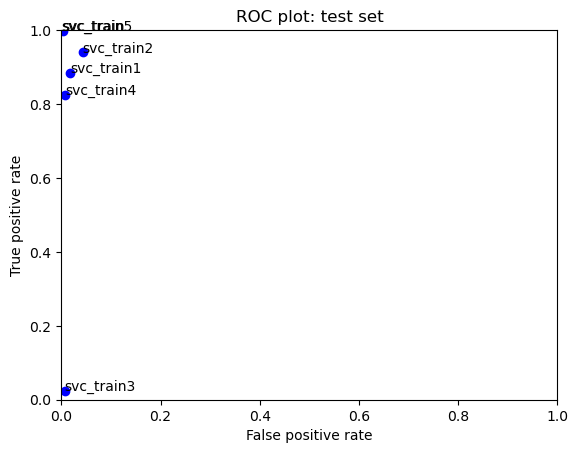

In [77]:
fits = [svc_performance_train, svc_performance_train1, svc_performance_train2, svc_performance_train3, svc_performance_train4, svc_performance_train5]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

### looking at reviews based on their classification

Let's say we decide that Ordinary Least Squares (OLS) Regression is the best model for generalization. Let's take a look at some of the reviews and try to make a (subjective) determination of whether it's generalizing well. 

In [78]:
prc_predictions = prc.predict(X_train)

### let's look at some false positives:

In [79]:
# false positives

print("Examples of false positives:")

import random, time

for i in range(0, len(prc_predictions)):
    if (prc_predictions[i] == 1):
        if (X_raw_train.iloc[i]['sentiment'] == 0):
            if (random.uniform(0, 1) < 0.05): # to print only 5% of the false positives
                print(i)
                print(X_raw_train.iloc[i]['review'])
                print('* * * * * * * * * ')


Examples of false positives:


---

# <span style="color:red">WARNING: Don't look at test set performance too much!</span>

---

The following cells show performance on your test set. Do not look at this too often! 

# Look at performance on the test set

### MODEL: ordinary least squares

In [80]:
ols_performance_test = BinaryClassificationPerformance(ols.predict(X_test), y_test, 'ols_test')
ols_performance_test.compute_measures()
print(ols_performance_test.performance_measures)

{'Pos': 2470, 'Neg': 2530, 'TP': 1745, 'TN': 781, 'FP': 1749, 'FN': 725, 'Accuracy': 0.5052, 'Precision': 0.4994275901545507, 'Recall': 0.7064777327935222, 'desc': 'ols_test'}


### MODEL: SVM, linear

In [81]:
svm_performance_test = BinaryClassificationPerformance(svm.predict(X_test), y_test, 'svm_test')
svm_performance_test.compute_measures()
print(svm_performance_test.performance_measures)

{'Pos': 2470, 'Neg': 2530, 'TP': 2070, 'TN': 2079, 'FP': 451, 'FN': 400, 'Accuracy': 0.8298, 'Precision': 0.8211027370091234, 'Recall': 0.8380566801619433, 'desc': 'svm_test'}


### MODEL: SVC

In [82]:
svc_performance_test = BinaryClassificationPerformance(svc.predict(X_test), y_test, 'svc_test')
svc_performance_test.compute_measures()
print(svc_performance_test.performance_measures)

{'Pos': 2470, 'Neg': 2530, 'TP': 2186, 'TN': 2216, 'FP': 314, 'FN': 284, 'Accuracy': 0.8804, 'Precision': 0.8744, 'Recall': 0.8850202429149797, 'desc': 'svc_test'}


In [83]:
svc_performance_test1 = BinaryClassificationPerformance(svc1.predict(X_test), y_test, 'svc_test1')
svc_performance_test1.compute_measures()
print(svc_performance_test1.performance_measures)

{'Pos': 2470, 'Neg': 2530, 'TP': 1853, 'TN': 2363, 'FP': 167, 'FN': 617, 'Accuracy': 0.8432, 'Precision': 0.9173267326732674, 'Recall': 0.7502024291497976, 'desc': 'svc_test1'}


In [84]:
svc_performance_test2 = BinaryClassificationPerformance(svc2.predict(X_test), y_test, 'svc_test2')
svc_performance_test2.compute_measures()
print(svc_performance_test2.performance_measures)

{'Pos': 2470, 'Neg': 2530, 'TP': 2118, 'TN': 2168, 'FP': 362, 'FN': 352, 'Accuracy': 0.8572, 'Precision': 0.8540322580645161, 'Recall': 0.8574898785425101, 'desc': 'svc_test2'}


In [85]:
svc_performance_test3 = BinaryClassificationPerformance(svc3.predict(X_test), y_test, 'svc_test3')
svc_performance_test3.compute_measures()
print(svc_performance_test3.performance_measures)

{'Pos': 2470, 'Neg': 2530, 'TP': 53, 'TN': 2517, 'FP': 13, 'FN': 2417, 'Accuracy': 0.514, 'Precision': 0.803030303030303, 'Recall': 0.02145748987854251, 'desc': 'svc_test3'}


In [86]:
svc_performance_test4 = BinaryClassificationPerformance(svc4.predict(X_test), y_test, 'svc_test4')
svc_performance_test4.compute_measures()
print(svc_performance_test4.performance_measures)

{'Pos': 2470, 'Neg': 2530, 'TP': 1625, 'TN': 2431, 'FP': 99, 'FN': 845, 'Accuracy': 0.8112, 'Precision': 0.9425754060324826, 'Recall': 0.6578947368421053, 'desc': 'svc_test4'}


In [87]:
svc_performance_test5 = BinaryClassificationPerformance(svc5.predict(X_test), y_test, 'svc_test5')
svc_performance_test5.compute_measures()
print(svc_performance_test5.performance_measures)

{'Pos': 2470, 'Neg': 2530, 'TP': 2075, 'TN': 2095, 'FP': 435, 'FN': 395, 'Accuracy': 0.834, 'Precision': 0.8266932270916335, 'Recall': 0.840080971659919, 'desc': 'svc_test5'}


### MODEL: logistic regression

In [88]:
lgs_performance_test = BinaryClassificationPerformance(lgs.predict(X_test), y_test, 'lgs_test')
lgs_performance_test.compute_measures()
print(lgs_performance_test.performance_measures)

{'Pos': 2470, 'Neg': 2530, 'TP': 2065, 'TN': 2124, 'FP': 406, 'FN': 405, 'Accuracy': 0.8378, 'Precision': 0.8356940509915014, 'Recall': 0.8360323886639676, 'desc': 'lgs_test'}


### MODEL: Naive Bayes

In [89]:
nbs_performance_test = BinaryClassificationPerformance(nbs.predict(X_test), y_test, 'nbs_test')
nbs_performance_test.compute_measures()
print(nbs_performance_test.performance_measures)

{'Pos': 2470, 'Neg': 2530, 'TP': 1825, 'TN': 1918, 'FP': 612, 'FN': 645, 'Accuracy': 0.7486, 'Precision': 0.7488715633976201, 'Recall': 0.7388663967611336, 'desc': 'nbs_test'}


### MODEL: Perceptron

In [90]:
prc_performance_test = BinaryClassificationPerformance(prc.predict(X_test), y_test, 'prc_test')
prc_performance_test.compute_measures()
print(prc_performance_test.performance_measures)

{'Pos': 2470, 'Neg': 2530, 'TP': 2054, 'TN': 2115, 'FP': 415, 'FN': 416, 'Accuracy': 0.8338, 'Precision': 0.8319157553665452, 'Recall': 0.8315789473684211, 'desc': 'prc_test'}


### MODEL: Ridge Regression Classifier

In [91]:
rdg_performance_test = BinaryClassificationPerformance(rdg.predict(X_test), y_test, 'rdg_test')
rdg_performance_test.compute_measures()
print(rdg_performance_test.performance_measures)

{'Pos': 2470, 'Neg': 2530, 'TP': 2098, 'TN': 2076, 'FP': 454, 'FN': 372, 'Accuracy': 0.8348, 'Precision': 0.8221003134796239, 'Recall': 0.8493927125506073, 'desc': 'rdg_test'}


In [92]:
rdg_p_test1 = BinaryClassificationPerformance(rdg_1.predict(X_test), y_test, 'rdg_test1')
rdg_p_test1.compute_measures()
print(rdg_p_test1.performance_measures)

{'Pos': 2470, 'Neg': 2530, 'TP': 2098, 'TN': 2076, 'FP': 454, 'FN': 372, 'Accuracy': 0.8348, 'Precision': 0.8221003134796239, 'Recall': 0.8493927125506073, 'desc': 'rdg_test1'}


In [93]:
rdg_p_test2 = BinaryClassificationPerformance(rdg_2.predict(X_test), y_test, 'rdg_test2')
rdg_p_test2.compute_measures()
print(rdg_p_test2.performance_measures)

{'Pos': 2470, 'Neg': 2530, 'TP': 2097, 'TN': 2074, 'FP': 456, 'FN': 373, 'Accuracy': 0.8342, 'Precision': 0.8213866039952996, 'Recall': 0.8489878542510122, 'desc': 'rdg_test2'}


In [94]:
rdg_p_test3 = BinaryClassificationPerformance(rdg_3.predict(X_test), y_test, 'rdg_test3')
rdg_p_test3.compute_measures()
print(rdg_p_test3.performance_measures)

ValueError: X has 74851 features, but RidgeClassifier is expecting 16386 features as input.

In [50]:
rdg_p_test4 = BinaryClassificationPerformance(rdg_4.predict(X_test), y_test, 'rdg_test4')
rdg_p_test4.compute_measures()
print(rdg_p_test4.performance_measures)

NameError: name 'rdg_4' is not defined

In [95]:
rdg_p_test5 = BinaryClassificationPerformance(rdg_5.predict(X_test), y_test, 'rdg_test5')
rdg_p_test5.compute_measures()
print(rdg_p_test5.performance_measures)

{'Pos': 2470, 'Neg': 2530, 'TP': 2186, 'TN': 2192, 'FP': 338, 'FN': 284, 'Accuracy': 0.8756, 'Precision': 0.8660855784469097, 'Recall': 0.8850202429149797, 'desc': 'rdg_test5'}


### MODEL: Random Forest Classifier

In [96]:
rdf_performance_test = BinaryClassificationPerformance(rdf.predict(X_test), y_test, 'rdf_test')
rdf_performance_test.compute_measures()
print(rdf_performance_test.performance_measures)

{'Pos': 2470, 'Neg': 2530, 'TP': 2132, 'TN': 1680, 'FP': 850, 'FN': 338, 'Accuracy': 0.7624, 'Precision': 0.7149564050972501, 'Recall': 0.8631578947368421, 'desc': 'rdf_test'}


### ROC plot to compare performance of various models and fits

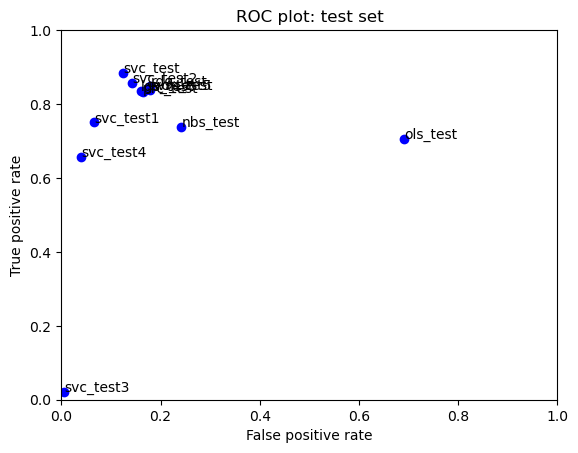

In [97]:
fits = [ols_performance_test, svm_performance_test, lgs_performance_test, nbs_performance_test, rdg_performance_test, prc_performance_test, svc_performance_test, svc_performance_test1, svc_performance_test2, svc_performance_test3, svc_performance_test4, svc_performance_test5]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

---

# <span style="color:red">SUBMISSION</span>

---

In [98]:
# read in test data for submission
# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
raw_data, X_test_submission = process_raw_data(fn='moviereviews_train.tsv', my_random_seed=88, test=True)
print("Number of rows in the submission test set (should be 25,000): ")

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 3 columns 

the data types for each of the columns in movie_data:
id           object
sentiment     int64
review       object
dtype: object 

the first 10 rows in movie_data:
       id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...
Shape of CountingVectorizer X:
(25000, 74849)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0         433          20
1         158          16
2         378          20
3         379           8
4         367           9
5          89           5
6         112           9
7 

---

Choose a <span style="color:red">*single*</span> model for your submission. In this code, I am choosing the Ordinary Least Squares model fit, which is in the `ols` object. But you should choose the model that is performing the best for you! 

In [99]:
# store the id from the raw data
my_submission = pd.DataFrame(raw_data["id"])
# concatenate predictions to the id
my_submission["prediction"] = svc.predict(X_test_submission)
# look at the proportion of positive predictions
print(my_submission['prediction'].mean())

0.50104


In [100]:
raw_data.head(25)

id  sentiment                                             review  \
0    5814_8          1  With all this stuff going down at the moment w...   
1    2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...   
2    7759_3          0  The film starts with a manager (Nicholas Bell)...   
3    3630_4          0  It must be assumed that those who praised this...   
4    9495_8          1  Superbly trashy and wondrously unpretentious 8...   
5    8196_8          1  I dont know why people think this is such a ba...   
6    7166_2          0  This movie could have been very good, but come...   
7   10633_1          0  I watched this video at a friend's house. I'm ...   
8     319_1          0  A friend of mine bought this film for £1, and ...   
9   8713_10          1  <br /><br />This movie is full of references. ...   
10   2486_3          0  What happens when an army of wetbacks, towelhe...   
11  6811_10          1  Although I generally do not like remakes belie...   
12  11744_9          1  \Mr. Harvey Lights a Candle\" is anchored by a...   
13   7369_1          0  I had a feeling that after \Submerged\", this ...   
14  12081_1          0  note to George Litman, and others: the Mystery...   
15   3561_4          0  Stephen King adaptation (scripted by King hims...   
16   4489_1          0  `The Matrix' was an exciting summer blockbuste...   
17   3951_2          0  Ulli Lommel's 1980 film 'The Boogey Man' is no...   
18  3304_10          1  This movie is one among the very few Indian mo...   
19  9352_10          1  Most people, especially young people, may not ...   
20   3374_7          1  \Soylent Green\" is one of the best and most d...   
21  10782_7          1  Michael Stearns plays Mike, a sexually frustra...   
22  5414_10          1  This happy-go-luck 1939 military swashbuckler,...   
23  10492_1          0  I would love to have that two hours of my life...   
24   3350_3          0  The script for this movie was probably found i...   

    word_count  punc_count  
0          433          20  
1          158          16  
2          378          20  
3          379           8  
4          367           9  
5           89           5  
6          112           9  
7          132           9  
8          163           7  
9           43           5  
10          48           2  
11         172          11  
12         382          15  
13         130          18  
14         112           7  
15         187           8  
16         395          27  
17         456          35  
18         241          16  
19         118          10  
20         231          14  
21         274          14  
22         254          12  
23          43           5  
24          38           4

In [101]:
my_submission.head(25)

id  prediction
0    5814_8           1
1    2381_9           1
2    7759_3           0
3    3630_4           0
4    9495_8           0
5    8196_8           1
6    7166_2           0
7   10633_1           0
8     319_1           0
9   8713_10           1
10   2486_3           1
11  6811_10           1
12  11744_9           1
13   7369_1           0
14  12081_1           0
15   3561_4           0
16   4489_1           0
17   3951_2           0
18  3304_10           1
19  9352_10           1
20   3374_7           1
21  10782_7           1
22  5414_10           1
23  10492_1           0
24   3350_3           0

In [102]:
my_submission.shape

(25000, 2)

In [103]:
# export submission file as pdf
# CHANGE FILE PATH: 
my_submission.to_csv('moviereviews_submission6.csv', index=False)

# Submit to Canvas: 1) the CSV file that was written in the previous cell and 2) the url to the repository (GitHub or other) that contains your code and documentation